In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# PyCon PH Stats

In [12]:
def get_attendees(year):
    df = pd.read_csv('{}/attendees.csv'.format(year))
    df = df.where(df['Checkin Status'] == 'Checked In')
    df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
    return df
csv_2015 = get_attendees(2015)
csv_2016 = get_attendees(2016)

In [13]:
pie_kwargs = dict(
    kind="pie",
    figsize=(5, 5),
    autopct="%.2f%%",
    cmap="rainbow",
)

## Gender ratio

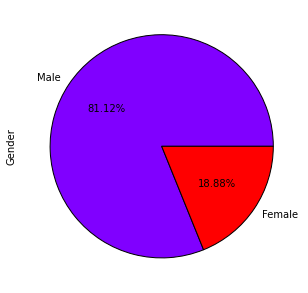

In [14]:
csv_2015['Gender'].value_counts().plot(**pie_kwargs)

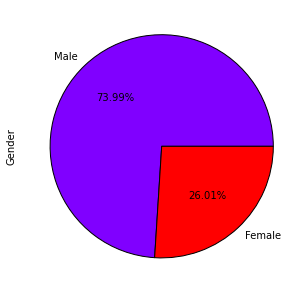

In [15]:
csv_2016['Gender'].value_counts().plot(**pie_kwargs)

Gender ratio has improved for this year. (Draw out more conclustion)

## Level of experience with Python

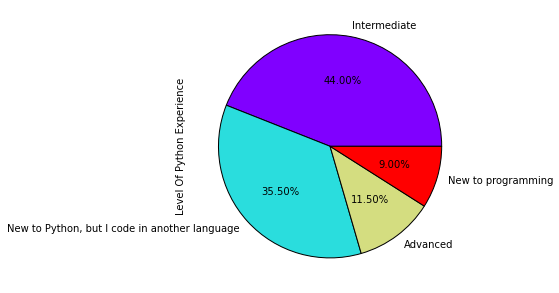

In [16]:
csv_2015['Level Of Python Experience'].value_counts().plot(**pie_kwargs)

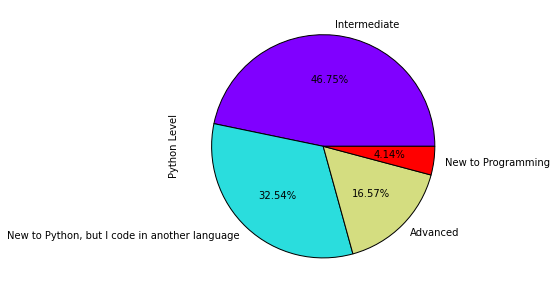

In [17]:
csv_2016['Python Level'].value_counts().plot(**pie_kwargs)

It's quite interesting to see a similar ratio for the previous year and this year. We can use this information in selecting talk topics that will make it to our program.

## Orders

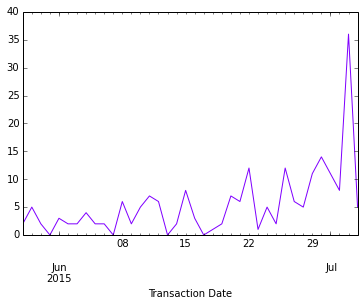

In [18]:
csv_2015.set_index(csv_2015['Transaction Date']).groupby(pd.TimeGrouper('D'))['Ticket ID'].count().plot(cmap="rainbow")

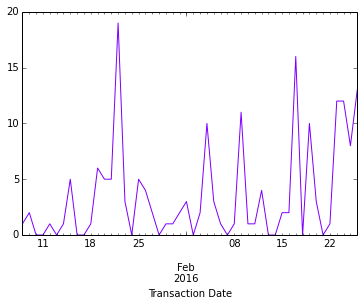

In [19]:
csv_2016.set_index(csv_2016['Transaction Date']).groupby(pd.TimeGrouper('D'))['Ticket ID'].count().plot(cmap="rainbow")